In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

df_job = pd.read_csv("../data/misgrosi_job1108.csv")
df_candidate = pd.read_csv('../data/misgrosi1108.csv')
df_density = pd.read_csv('../../density.csv')

In [2]:
def stadt(row):
    try:
        post_stadt = row['Location'].split()

        if len(post_stadt) == 2 :
            val = post_stadt[1]
        elif not post_stadt[0].isdigit():
            val = post_stadt[0]
        else:
            val = None
    except:
        val = None
    return val
        
df_job['Stadt'] = df_job.apply(stadt, axis=1)
df_candidate['Stadt'] = df_candidate.apply(stadt, axis=1)
df_job.head()

,Unnamed: 0,Position,Company,Location,Job Type,Stadt,Post Code
0,0,Oma gesucht in Basel\r\nSilMa,SilMa,4056 Basel,Grosi & Opi,Basel,4056.0
1,1,Grosi gesucht in Hünenberg\r\nLuca2013,Luca2013,6331 Hünenberg,Grosi & Opi,Hünenberg,6331.0
2,2,Ein Herzens-Grosi gesucht zum Aufbau einer lie...,Calendula,8165 Schöfflisdorf,Grosi & Opi,Schöfflisdorf,8165.0
3,3,Wir suchen eine langfristige Ergänzung unseres...,Laura B.,8608 Bubikon,Grosi & Opi,Bubikon,8608.0
4,4,Grosi gesucht in Dübendorf\r\nTamaraa,Tamaraa,8600 Dübendorf,Babysitting,Dübendorf,8600.0


In [3]:
df_candidate.head()

,Name,Intro,Location,Role,Stadt
0,Wunsch-Grosi Gaby,Ich möchte einem Kind Zeit und Aufmerksamkeit ...,8053 Zür,Oma & Opa Kinderbetreuung,Zür
1,Dawn,Begleitung auf den Spielplatz oder Zoo etc.,6010 Kriens,Tages-Grosi,Kriens
2,Wunsch-Grosi Nani,"Aktive, reife Frau sucht Aufgabe als Kinderbet...",4056 Basel,Grosi als Nanny / Haushaltshilfe,Basel
3,Nani Moni,Einfach ein lässiges Grosi sy,4900 Langenthal,Tages-Grosi,Langenthal
4,Jida,Betreue Kinder aus allen Kulturen,4051 Basel,Tages-Grosi,Basel


In [4]:
def post(row):
    try:
        post_stadt = row['Location'].split()
        if post_stadt[0].isdigit():
            val = int(post_stadt[0])
        else:
            val = None
    except:
        val = str(row['Location'])
    
    return val
        
df_job['Post Code'] = df_job.apply(post, axis=1)

In [5]:
df_candidate['Post Code'] = df_candidate.apply(post, axis=1)

In [6]:
df_job_count = df_job.groupby(['Post Code']).size().reset_index(name = 'number')
df_job_count
max_number = df_job_count['number'].max()
max_number

16

In [7]:
df_candidate_count = df_candidate.groupby(['Post Code']).size().reset_index(name = 'Counts')
df_candidate_count
max=df_candidate_count['Counts'].max()
max

2

In [8]:
# Convert 'Post Code' column to a common numeric type (Int64) to handle NaN values
df_job_count['Post Code'] = pd.to_numeric(df_job_count['Post Code'], errors='coerce', downcast='integer')
df_candidate_count['Post Code'] = pd.to_numeric(df_candidate_count['Post Code'], errors='coerce', downcast='integer')

# Merge the two DataFrames based on the 'Post Code' column using an outer join
df = df_job_count.merge(df_candidate_count, on='Post Code', how='outer')

# Fill any missing (NaN) values with 0
df = df.fillna(0)


In [9]:
df=df.merge(df_density,on="Post Code", how="left")
df = df.dropna(subset = ['Density'])
df['jobs_per_capita'] = 100*df['number']/df['Population']
df['candidate_per_capita'] = 100*df['Counts']/df['Population']
df

,Post Code,number,Counts,Unnamed: 0,City,Region,Area,Population,Density,jobs_per_capita,candidate_per_capita
0,1794.0,1.0,0.0,569.0,NaN,Canton of Fribourg,3.795,677.0,178.392622,0.147710,0.000000
1,2000.0,2.0,0.0,764.0,Neuchâtel,Canton of Neuchâtel,31.600,33200.0,1050.632911,0.006024,0.000000
2,2502.0,2.0,0.0,938.0,NaN,Canton of Bern,6.400,17803.0,2781.718750,0.011234,0.000000
3,2503.0,2.0,0.0,939.0,NaN,Canton of Bern,2.954,18295.0,6193.297224,0.010932,0.000000
4,2504.0,1.0,0.0,940.0,NaN,Canton of Bern,9.700,17751.0,1830.000000,0.005633,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
608,8152.0,0.0,1.0,2881.0,Glattbrugg,Canton of Zürich,5.800,21219.0,3658.448276,0.000000,0.004713
609,8825.0,0.0,1.0,3076.0,NaN,Canton of Zürich,7.300,877.0,120.136986,0.000000,0.114025
610,8932.0,0.0,1.0,3094.0,Mettmenstetten,Canton of Zürich,13.000,5635.0,433.461538,0.000000,0.017746
611,9062.0,0.0,1.0,3504.0,NaN,Appenzell Ausserrhoden,1.401,482.0,344.039971,0.000000,0.207469


In [17]:
def draw_worker_density(xv,yv,df):
    plt.figure(figsize=(10, 6), dpi=80)
    ax = sns.scatterplot(x=xv, y=yv, data=df)
    ax.set_title('Misgrosi')
   # ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.set_xlabel('candidate_per_capita')
    ax.set_ylabel('jobs_per_capita')

In [18]:
from scipy import stats
def draw_corr(df,col1, col2):
    draw_worker_density(col1,col2,df)
    p = stats.pearsonr(df[col1], df[col2])
    s = stats.spearmanr(df[col1], df[col2])
    k = stats.kendalltau(df[col1], df[col2])
    print(f'pearson r: {p[0]}, p value: {p[1]}')
    print(f'Spearman rho: {s[0]}, p value: {s[1]}')
    print(f'kendall tau: {k[0]}, p value: {k[1]}')

pearson r: -0.11100698849710638, p value: 0.006765934376642736
Spearman rho: -0.28238249963699663, p value: 2.367188391433398e-12
kendall tau: -0.22592954006040783, p value: 3.5708823871951314e-12


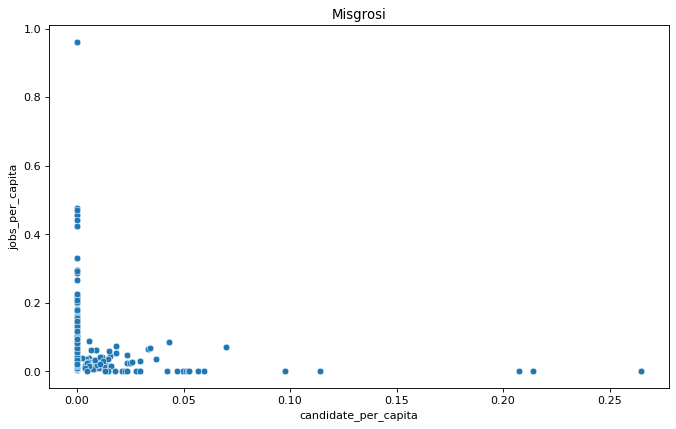

In [19]:
draw_corr(df,'candidate_per_capita','jobs_per_capita')